## Download Datasets

In [1]:
import urllib.request
import os

In [2]:
# download training dataset
url_1 = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1530516448&Signature=mVnnWeE%2BGzOXe2KtfIX6k9nh7FvphehDcem%2Fp9HQqYyMi11xbUFpwAwx2m1yZz6SjWpgQ86JGBHxAZrTxyQbiulX20FvGy%2FPCZMtt5di6WKCnOv61kUZout%2F%2BeDIaBb0m2wS3GxkQ39TXauIB8%2FEviSyVy5IUBRqm9p1YvMx2lptwNEGia7WMS3HfWW2CMPcyxZxiJgWIdi9Ur09WlqMD%2BUAmaOAjp5xcdCnSIp4Xr68xpwDC9Ec%2BSIcBrv%2FwSODdzmWimMO8hpc3%2Ba5RM6XijOjQLTk4ATOQtdQd989obuY2TCpm43JAvh%2BCZa5Iu2YBbS6Yt6kYaXlXMVQHDrj9A%3D%3D'
file_path_1 = 'titanic_train.csv'
if not os.path.isfile(file_path_1):
    result_1 = urllib.request.urlretrieve(url_1, file_path_1)
    print('download:', result_1)

download: ('titanic_train.csv', <http.client.HTTPMessage object at 0x10a5b5c18>)


In [3]:
# download testing sataset
url_2 = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1530516602&Signature=PSro%2BVTemNrv6jmW6razMjS7oMHXa9Fo7yKnvEwv2A6tjP8%2BvASDJah1A%2F3cOyWuktijzC7KkLAy2Nz1sGT1h6bq6tNMsHFmu290Fm5sw3Uj0ieqUKpXp5VIdfT%2FqyFchrlcqhBka1ewygcKkYOcpwYJ%2BkIa1NDrGaodQ1ItZBDQdavMGFqpTILdfDKu4gxUHcDikTm6%2Ft%2FhVPKCHTxUGY89odi9CGRyW1YD3Xj2k0WcZKM6h13d7Ft14CcaTaxSFSwX1jA%2FybPfZZaJEv8XhVPN0xjsJB8LnnW%2BrECTi2eEEMXxk7xQUOlQx3L9mHH1AFcrFHe8SRpcRxsmEYS0Mw%3D%3D'
file_path_2 = 'titanic_test.csv'
if not os.path.isfile(file_path_2):
    result_2 = urllib.request.urlretrieve(url_2, file_path_2)
    print('download:', result_2)

download: ('titanic_test.csv', <http.client.HTTPMessage object at 0x10ae49080>)


## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data Frame

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

#### Quick Look Training & Testing Datasets

In [3]:
print('training data shape = {}:\n'.format(df_train.shape))
df_train.head(3)

training data shape = (891, 12):



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('testing data shape = {}:\n'.format(df_test.shape))
df_test.head(3)

testing data shape = (418, 11):



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
# replace embarked values
df_train.Embarked.replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'], inplace=True)
df_test.Embarked.replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'], inplace=True)

#### Missing Value Handling

In [6]:
# check the missing value of training and testing data
print('missing value of training data:\n{}'.format(df_train.isnull().sum()))
print()
print('missing value of testing data:\n{}'.format(df_test.isnull().sum()))

missing value of training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing value of testing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# age feature (replace missing values with the median)
df_train.Age.fillna(value=df_train.Age.median(), inplace=True)
df_test.Age.fillna(value=df_test.Age.median(), inplace=True)

# fara feature (replace missing values with the median)
df_test.Fare.fillna(value=df_test.Fare.median(), inplace=True)

# embarked feature (replace missing values with the mode)
df_train.Embarked.fillna(value=df_train.Embarked.value_counts().index[0], inplace=True)

# remove cabin feature (too many missing values)
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

## Feature Engineering

#### Age Feature

In [8]:
# define age group
bins = [0, 6, 12, 18, 40, 65, max(max(df_train.Age), max(df_test.Age))]
age_group = ['Baby', 'Child', 'Teenager', 'Adult', 'MiddleAged', 'Older']

# add a nwe feature
df_train['AgeGroup'] = pd.cut(df_train.Age, bins, labels=age_group)
df_test['AgeGroup'] = pd.cut(df_test.Age, bins, labels=age_group)

#### Fare Feature

In [9]:
# define fare range
fare_range = ['Low', 'Medium', 'High', 'Expensive']

# add new feature
df_train['FareRange'] = pd.qcut(df_train.Fare, q=4, labels=fare_range)
df_test['FareRange'] = pd.qcut(df_test.Fare, q=4, labels=fare_range)

#### SibSp and Parch Feature

In [10]:
# define family size feature (+1 represents oneself)
df_train['FamilySize'] = df_train.SibSp.values + df_train.Parch.values + 1
df_test['FamilySize'] = df_test.SibSp.values + df_test.Parch.values + 1

# define new feature, check 'is alone or not' has impact on survival rate
df_train['IsAlone'] = df_train.FamilySize.apply(lambda x: 'No' if x!=1 else 'Yes')
df_test['IsAlone'] = df_test.FamilySize.apply(lambda x: 'No' if x!=1 else 'Yes')

#### Name Feature

In [11]:
print('name feature of training data frame:')
print(df_train.Name.head(3))
print()
print('name feature of testing data frame:')
print(df_test.Name.head(3))

name feature of training data frame:
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

name feature of testing data frame:
0                    Kelly, Mr. James
1    Wilkes, Mrs. James (Ellen Needs)
2           Myles, Mr. Thomas Francis
Name: Name, dtype: object


In [12]:
# separate first name and last name, get the title
df_train['Title'] = df_train.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])
df_test['Title'] = df_test.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])

In [13]:
print('title feature of training data frame:')
print(df_train.Title.value_counts())
print()
print('title feature of testing data frame:')
print(df_test.Title.value_counts())

title feature of training data frame:
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Lady              1
the Countess      1
Mme               1
Ms                1
Don               1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

title feature of testing data frame:
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64


In [14]:
# replace the rare title with 'Rare' title
rare_title_train = df_train.Title.value_counts().index[6:]
rare_title_test = df_test.Title.value_counts().index[5:]

df_train.Title.replace(rare_title_train, 'Rare', inplace=True)
df_test.Title.replace(rare_title_test, 'Rare', inplace=True)

In [15]:
print('title feature of training data frame:')
print(df_train.Title.value_counts())
print()
print('title feature of testing data frame:')
print(df_test.Title.value_counts())

title feature of training data frame:
Mr        517
Miss      182
Mrs       125
Master     40
Rare       14
Dr          7
Rev         6
Name: Title, dtype: int64

title feature of testing data frame:
Mr        240
Miss       78
Mrs        72
Master     21
Rare        5
Col         2
Name: Title, dtype: int64


## Visualization (each feature v.s. survived)

#### For training data, check what impact does each feature have on survival rate

In [16]:
# define a function that could plot the survival correlation by each feature
def plotFeatureSurvived(features):
    fig = plt.figure(figsize=(25, 13), facecolor='w')
    for i, j in enumerate(features):
        ax = fig.add_subplot(2, 4, i+1)
        result = sns.barplot(x=j, y='Survived', data=df_train, ci=None, ax=ax)
        result.set_xlabel('')
        result.set_ylabel('Survival rate')
        result.set_title('%s feature'%(j))

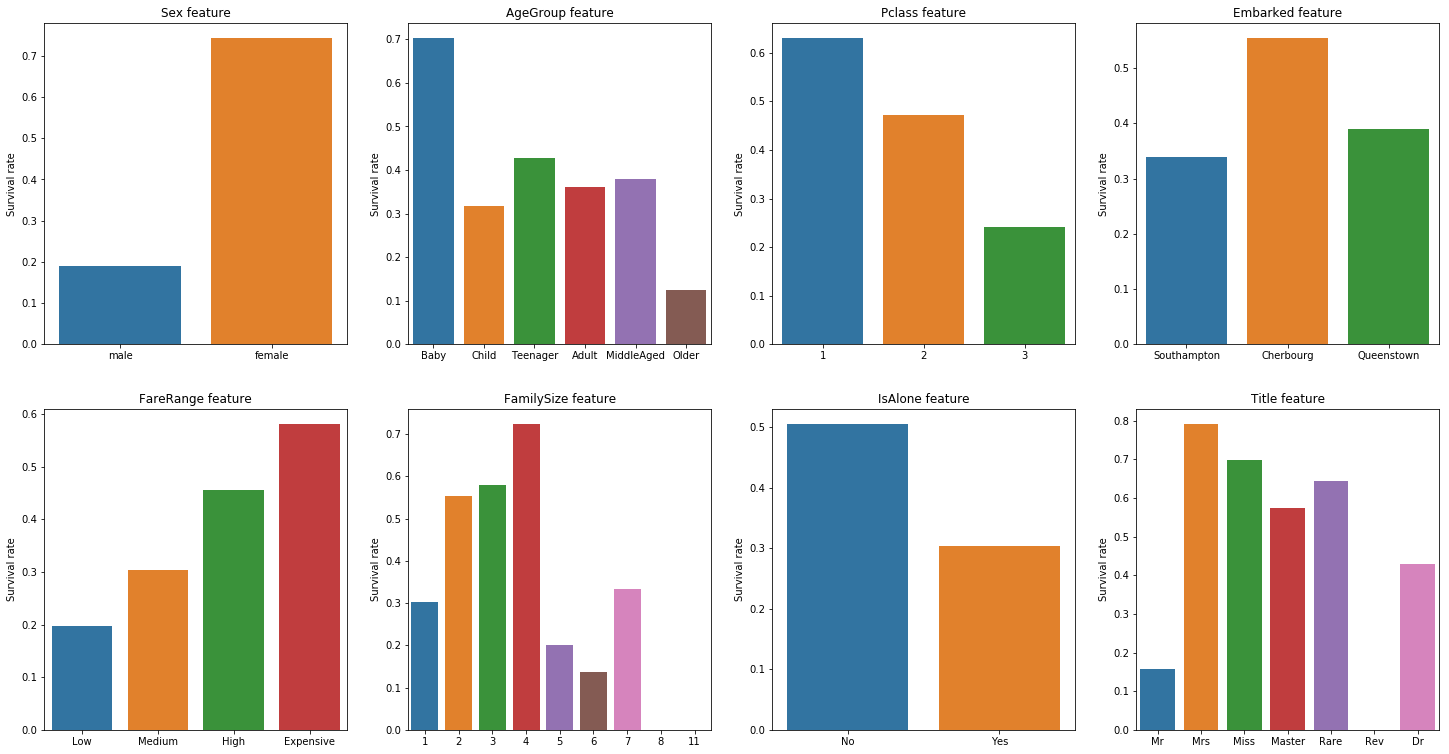

In [17]:
feature_list = ['Sex', 'AgeGroup', 'Pclass', 'Embarked', 'FareRange', 'FamilySize', 'IsAlone', 'Title']
plotFeatureSurvived(feature_list)

## Feature Selection

#### Drop the Meaningless Features

In [18]:
df_train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df_test.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [19]:
print('training data frame:\n')
df_train.head(3)

training data frame:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareRange,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,Southampton,Adult,Low,2,No,Mr
1,1,1,female,38.0,1,0,71.2833,Cherbourg,Adult,Expensive,2,No,Mrs
2,1,3,female,26.0,0,0,7.9250,Southampton,Adult,Medium,1,Yes,Miss


#### Feature Importance with Random Forest

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def plotFeatureImportance(data, features, response):
    # label the categorical features
    gle = LabelEncoder()
    for feature in features:
        data[feature] = gle.fit_transform(data[feature])
    
    # calculate feature importances with random forest
    forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    forest.fit(data.iloc[:, 1:], response)
    importances = forest.feature_importances_
    
    # plot the importances by each feature
    plt.figure(figsize=(8, 5), facecolor='w')
    ax = sns.barplot(x=importances, y=df_train.iloc[:, 1:].columns, ci=None)
    ax.set_xlabel('')
    ax.set_ylabel('Feature')
    ax.set_title('Feature Importances')

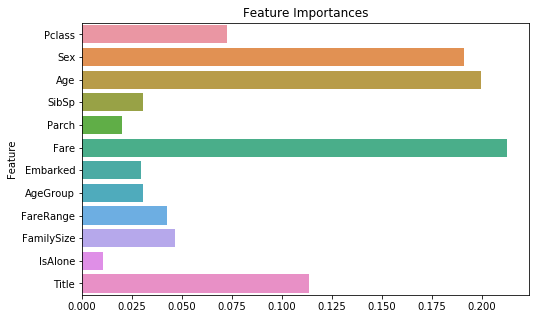

In [21]:
categorical_feature = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FareRange', 'IsAlone', 'Title']
plotFeatureImportance(data=df_train, features=categorical_feature, response=df_train.Survived)

#### Feature Matrix & response vector

In [22]:
X_train = df_train.copy().drop(columns=['Survived', 'SibSp', 'Parch', 'AgeGroup', 'FareRange', 'IsAlone'])
y_train = df_train.Survived
X_test = df_test.copy().drop(columns=['SibSp', 'Parch', 'AgeGroup', 'FareRange', 'IsAlone'])

print('features selected in training data:\n{}'.format(X_train.columns))
print()
print('features selected in testing data:\n{}'.format(X_test.columns))

features selected in training data:
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title'], dtype='object')

features selected in testing data:
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title'], dtype='object')


#### One-Hot Encoding

In [23]:
# one-hot encoding the categorical features

# training data
X_train = pd.get_dummies(data=X_train, columns=['Pclass', 'Sex', 'Embarked', 'Title'])

# testing data
X_test = pd.get_dummies(data=X_test, columns=['Pclass', 'Sex', 'Embarked', 'Title'])

#### Feature Scaling

In [24]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [25]:
# let the feature be in a range 0~1

# training data
X_train.Age = scaler.fit_transform(X_train.Age.values.reshape(-1, 1))
X_train.Fare = scaler.fit_transform(X_train.Fare.values.reshape(-1, 1))
X_train.FamilySize = X_train.FamilySize.values / max(X_train.FamilySize.values)

# testing data
X_test.Age = scaler.fit_transform(X_test.Age.values.reshape(-1, 1))
X_test.Fare = scaler.fit_transform(X_test.Fare.values.reshape(-1, 1))
X_test.FamilySize = X_test.FamilySize.values / max(X_test.FamilySize.values)

#### Split Training Datasets into Training and Validation Datasets

In [26]:
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, 
                                                                          test_size=0.4, random_state=2)

## Neural Network with Keras

In [27]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### Establish Neural Network with One Hidding Layer Including 40 Neurons

In [33]:
model = Sequential()

# input layer & hidden layer
model.add(Dense(input_dim=len(X_train.columns), units=40, kernel_initializer='normal', activation='relu'))

# output layer: binary classification, use sigmoid
model.add(Dense(units=1, kernel_initializer='normal', activation='sigmoid'))

In [34]:
# it's a binary classification problem, use binary cross entropy as loss function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_train_split, y=y_train_split, validation_split=0.2, 
                          epochs=30, batch_size=30, verbose=0)

In [35]:
def plotTrainHistory(train_history):
    plt.figure(facecolor='w')
    plt.plot(train_history.history['acc'], label='Train')
    plt.plot(train_history.history['val_acc'], label='Validation')
    plt.title('Train history')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
    plt.legend()

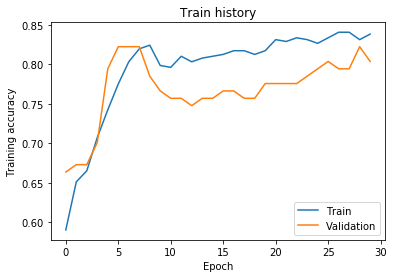

In [36]:
plotTrainHistory(train_history)

In [37]:
# use validation set to evaluate accuracy
scores = model.evaluate(X_val_split, y_val_split, verbose=1)
print('Accuracy = {}%'.format(scores[1]*100))

357/357 [==============================] - 0s 26us/step
Accuracy = 82.6330532379845%


In [38]:
print('number of features of training data: {}'.format(len(X_train.columns)))
print('number of features of testing data: {}'.format(len(X_test.columns)))

number of features of training data: 18
number of features of testing data: 17


In [39]:
# since there is no Dr title in testing data
X_test['Dr'] = 0

In [40]:
# prediction
pred_NN = model.predict_classes(X_test)

## Scikit-Learn Module

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
classifier_dict = {'Logistic Regression':LogisticRegression(), 
                   'Support Vector Machine':SVC(), 
                   'k-Nearest Neighbors':KNeighborsClassifier(), 
                   'Decision Tree':DecisionTreeClassifier(criterion='entropy', random_state=2),
                   'Random Forest':RandomForestClassifier(criterion='gini', random_state=7)}

In [43]:
y_pred = np.zeros((len(classifier_dict), y_val_split.size))
pred_sklearn = np.zeros((len(classifier_dict), len(X_test)))
scores_classifier = np.zeros(len(classifier_dict))
for i, j in enumerate(classifier_dict.keys()):
    classifier = classifier_dict[j]
    classifier.fit(X_train_split, y_train_split)
    y_pred[i] = classifier.predict(X_val_split)
    scores_classifier[i] = accuracy_score(y_pred[i], y_val_split) * 100
    
    pred_sklearn[i] = classifier.predict(X_test)

print('Classification accuracy by scikit learn module:\n')
pd.DataFrame(scores_classifier, columns=['Accuracy'], index=list(classifier_dict.keys()))

Classification accuracy by scikit learn module:



,Accuracy
Logistic Regression,82.633053
Support Vector Machine,81.232493
k-Nearest Neighbors,82.633053
Decision Tree,83.473389
Random Forest,81.792717


## Evaluation Accuracy by Each Algorithm

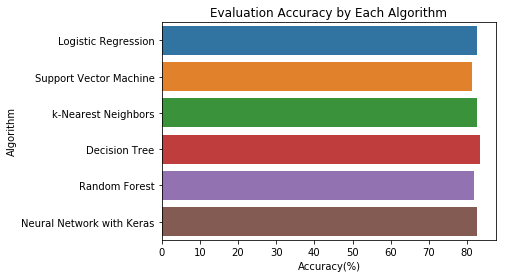

In [44]:
classifier_list = list(classifier_dict.keys())
classifier_list.append('Neural Network with Keras')
accuracy = np.concatenate((scores_classifier, np.array([scores[1]*100])))

plt.figure(facecolor='w')
ax = sns.barplot(x=accuracy, y=classifier_list, ci=None)
ax.set_xlabel('Accuracy(%)')
ax.set_ylabel('Algorithm')
ax.set_title('Evaluation Accuracy by Each Algorithm')

## Prediction Results

In [45]:
pred_result = pd.concat([pd.DataFrame(pred_sklearn.astype(int).T), (pd.DataFrame(pred_NN))], axis=1)
pred_result.columns = classifier_list
pred_result.head(10)

,Logistic Regression,Support Vector Machine,k-Nearest Neighbors,Decision Tree,Random Forest,Neural Network with Keras
0,0,0,0,0,0,0
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1
5,0,0,0,0,0,0
6,1,1,1,0,0,1
7,0,0,0,0,0,0
8,1,1,1,1,1,1
9,0,0,0,0,0,0
